<a href="https://colab.research.google.com/github/abdielbatista/Classifica-o-dados/blob/main/classificacao_v_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libs para modelagem e matrizes
import numpy as np
import pandas as pd

#libs para analises graficas
import matplotlib.pyplot as plt
import seaborn as sns

#libs para ignorar avisos
import warnings

#desabilitar avisos
warnings.filterwarnings('ignore')

In [ ]:
#lendo os dados
bd = pd.read_csv('/content/sic-metricas.csv')

#verificando as 5 primeiras linhas
bd.head()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,IsSingleNode,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,selected,SelfLoops,shared name,Stress,TopologicalCoefficient
0,7.284477,0.003115,0.137278,0.214286,24,14,False,25,3.000000,0,24,8,0.934537,False,0,25,421940,0.250000
1,7.285516,0.001038,0.137259,0.400000,16,14,False,27,4.000000,0,16,5,0.934526,False,0,27,210960,0.333333
2,6.289328,0.005531,0.159000,0.466667,12,13,False,23,7.833333,0,12,6,0.944903,False,0,23,773476,0.290123
3,5.621275,0.007808,0.177896,0.181818,30,13,False,31,8.750000,0,30,12,0.951862,False,0,31,1181032,0.128676
4,5.477131,0.000479,0.182577,0.523810,16,13,False,29,22.285714,0,16,7,0.953363,False,0,29,121978,0.327731


In [ ]:
bd.shape

(3380, 18)

In [ ]:
X = bd.iloc[:, :-1].values
y = bd.iloc[:, 4].values

In [ ]:
y

array([0.00311538, 0.0010377 , 0.00553055, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          23       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       0.0
          39       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       0.0
          45       0.00      0.00      0.00       0.0
          47       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       0.0
          57   

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [ ]:
correlacao = bd.corr()

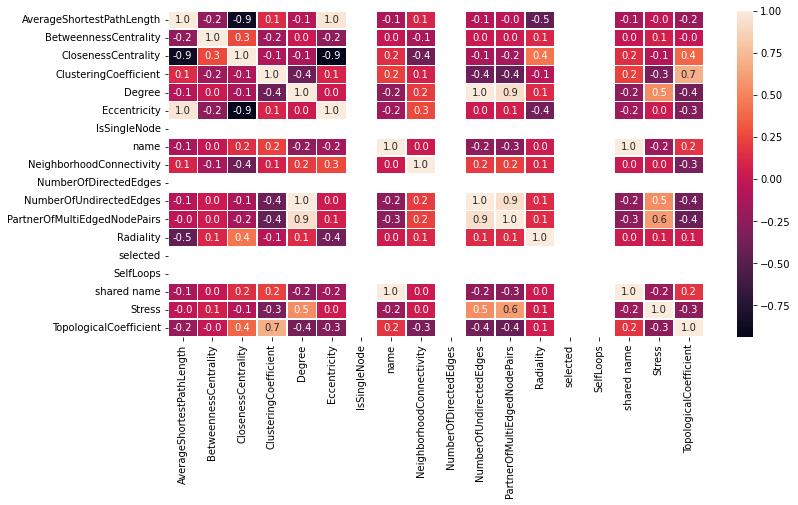

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)